In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
defaults = pd.read_csv("../../data/SVM_exercises/defaults.csv", sep = ";")
defaults_valid = pd.read_csv("../../data/SVM_exercises/defaults_valid.csv", sep = ";")
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27999.00000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,14000.00000,167099.170685,1.604557,1.845780,1.556484,35.380264,-0.010572,-0.130112,-0.163292,-0.217472,...,43222.489696,40387.979856,38903.331155,5579.850923,5.847387e+03,5131.236580,4813.350048,4755.416801,5184.075574,0.221794
std,8082.75943,129742.554832,0.488954,0.785705,0.521295,9.276226,1.122965,1.194718,1.195233,1.163331,...,64235.169551,60759.487603,59435.211063,15162.343572,2.105127e+04,16606.364862,15307.325671,14887.656280,17602.985657,0.415460
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.50000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2378.000000,1799.500000,1268.000000,1000.000000,8.395000e+02,390.000000,295.000000,264.000000,109.000000,0.000000
50%,14000.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20999.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54391.000000,50150.500000,49165.500000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.500000,4000.000000,0.000000
max,27999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


In [3]:
defaults.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
defaults["default payment next month"].value_counts() / len(defaults)

0    0.778206
1    0.221794
Name: default payment next month, dtype: float64

## Zbiór jest lekko niezbalansowany - 22% jedynek w klasie decyzyjnej (default payment next month)

In [5]:
defaults = defaults.sample(n = 2000)

### Czy do oceny jakości klasyfikacji modelu korzystniejsza jest w tym przypadku F miara czy “balanced accuracy”.

### F Score vs Balanced Accuracy - przez to, że korzystam z niezbalansowanych danych to do oceny jakości klasyfikacji modelu korzystniejsze jest balanced accuracy. Balanced Accuracy to średnia ze Specifity i Recall. Obydwie te metryki są niewrażliwe na niezbalansowanie zbioru uczącego.

In [49]:
y = defaults.pop("default payment next month")
X = defaults.copy()
y_valid = defaults_valid.pop("default payment next month")
X_valid = defaults_valid.copy()

In [7]:
model = SVC(gamma="scale")
cv_results = cross_validate(
    estimator=model,
    X=X,
    y=y,
    scoring=["roc_auc", "recall", "balanced_accuracy"],
    cv=5,
    return_train_score=True
)

In [8]:
cv_results = pd.DataFrame(cv_results)

In [9]:
cv_results

,fit_time,score_time,test_roc_auc,train_roc_auc,test_recall,train_recall,test_balanced_accuracy,train_balanced_accuracy
0,0.104555,0.077583,0.572167,0.714423,0.0,0.002801,0.5,0.501401
1,0.094423,0.096958,0.573901,0.710513,0.0,0.002801,0.5,0.501401
2,0.104002,0.097096,0.625384,0.724260,0.0,0.002801,0.5,0.501401
3,0.097167,0.083079,0.559305,0.695295,0.0,0.000000,0.5,0.500000
4,0.116906,0.075001,0.540323,0.716360,0.0,0.002809,0.5,0.501404


C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


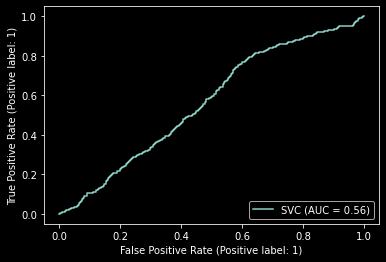

In [55]:
# X_dropped = X.drop(columns=['PAY_2', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_0', 'AGE'])
X_valid_dropped = X_valid.drop(columns=['PAY_2', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_0', 'AGE'])
model.fit(X_dropped, y)
plot_roc_curve(model, X_valid_dropped, y_valid)

In [21]:
result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42)
result.pop('importances');

array([[ 2.76849559e-02,  1.56734249e-02,  1.63313538e-02,
         1.85374356e-02,  1.89976972e-02,  2.73877337e-02,
         2.48570159e-02,  2.26653624e-02,  1.50659949e-02,
         2.11604943e-02],
       [ 1.25170975e-01,  1.34195855e-01,  1.58034235e-01,
         1.36500049e-01,  1.44201857e-01,  1.46021261e-01,
         1.48732333e-01,  1.49642756e-01,  1.54391098e-01,
         1.36227355e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [47]:
pi_results_df = pd.DataFrame(result)
pi_results_df.index=X.columns
pi_results_df = pi_results_df.sort_values('importances_mean')

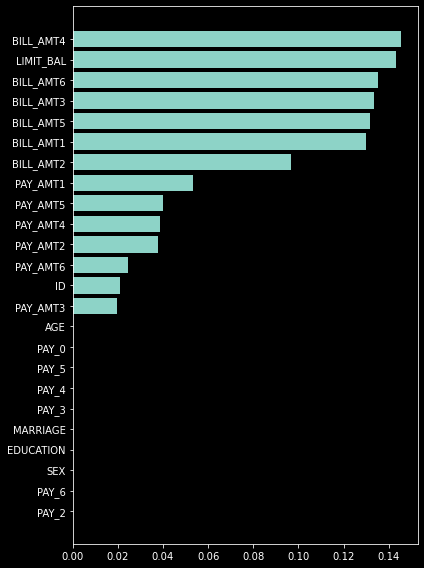

In [43]:
import seaborn as sns
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(pi_results_df.index, pi_results_df.importances_mean)
fig.tight_layout()
plt.show()

In [ ]:

model.predict(X_valid)
